# Análise de Dados com R

In [1]:
library(dplyr)
library(ggplot2)
library(datasauRus)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
str(datasaurus_dozen)

tibble[,3] [1,846 × 3] (S3: tbl_df/tbl/data.frame)
 $ dataset: chr [1:1846] "dino" "dino" "dino" "dino" ...
 $ x      : num [1:1846] 55.4 51.5 46.2 42.8 40.8 ...
 $ y      : num [1:1846] 97.2 96 94.5 91.4 88.3 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 3
  .. ..$ dataset: list()
  .. .. ..- attr(*, "class")= chr [1:2] "collector_character" "collector"
  .. ..$ x      : list()
  .. .. ..- attr(*, "class")= chr [1:2] "collector_double" "collector"
  .. ..$ y      : list()
  .. .. ..- attr(*, "class")= chr [1:2] "collector_double" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr [1:2] "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


In [40]:
datasaurus_dozen %>% sample_n(size = 10)

dataset,x,y
<chr>,<dbl>,<dbl>
v_lines,69.51912,71.11597
dots,52.50009,51.59436
star,56.17140,32.11799
slant_down,57.11245,15.32179
circle,34.57531,72.72484
dots,50.21670,83.75234
high_lines,72.27252,67.64444
bullseye,43.80703,11.31894
slant_up,95.26053,46.00883


In [3]:
df = datasaurus_dozen %>%
    group_by(dataset) %>%
    summarize(mean_x = mean(x),
             mean_y = mean(y),
             ci_95_x = (1.96 * sd(x)) / sqrt(n()),
             ci_95_y = (1.96 * sd(y)) / sqrt(n()),
             cor_pearson = cor(x, y)) %>%
    ungroup()

df

dataset,mean_x,mean_y,ci_95_x,ci_95_y,cor_pearson
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
away,54.26610,47.83472,2.758293,4.431037,-0.06412835
bullseye,54.26873,47.83082,2.758197,4.430376,-0.06858639
circle,54.26732,47.83772,2.756679,4.429440,-0.06834336
dino,54.26327,47.83225,2.757523,4.430323,-0.06447185
dots,54.26030,47.83983,2.757950,4.429466,-0.06034144
h_lines,54.26144,47.83025,2.757647,4.431059,-0.06171484
high_lines,54.26881,47.83545,2.757780,4.431079,-0.06850422
slant_down,54.26785,47.83590,2.757789,4.430438,-0.06897974
slant_up,54.26588,47.83150,2.758133,4.430850,-0.06860921


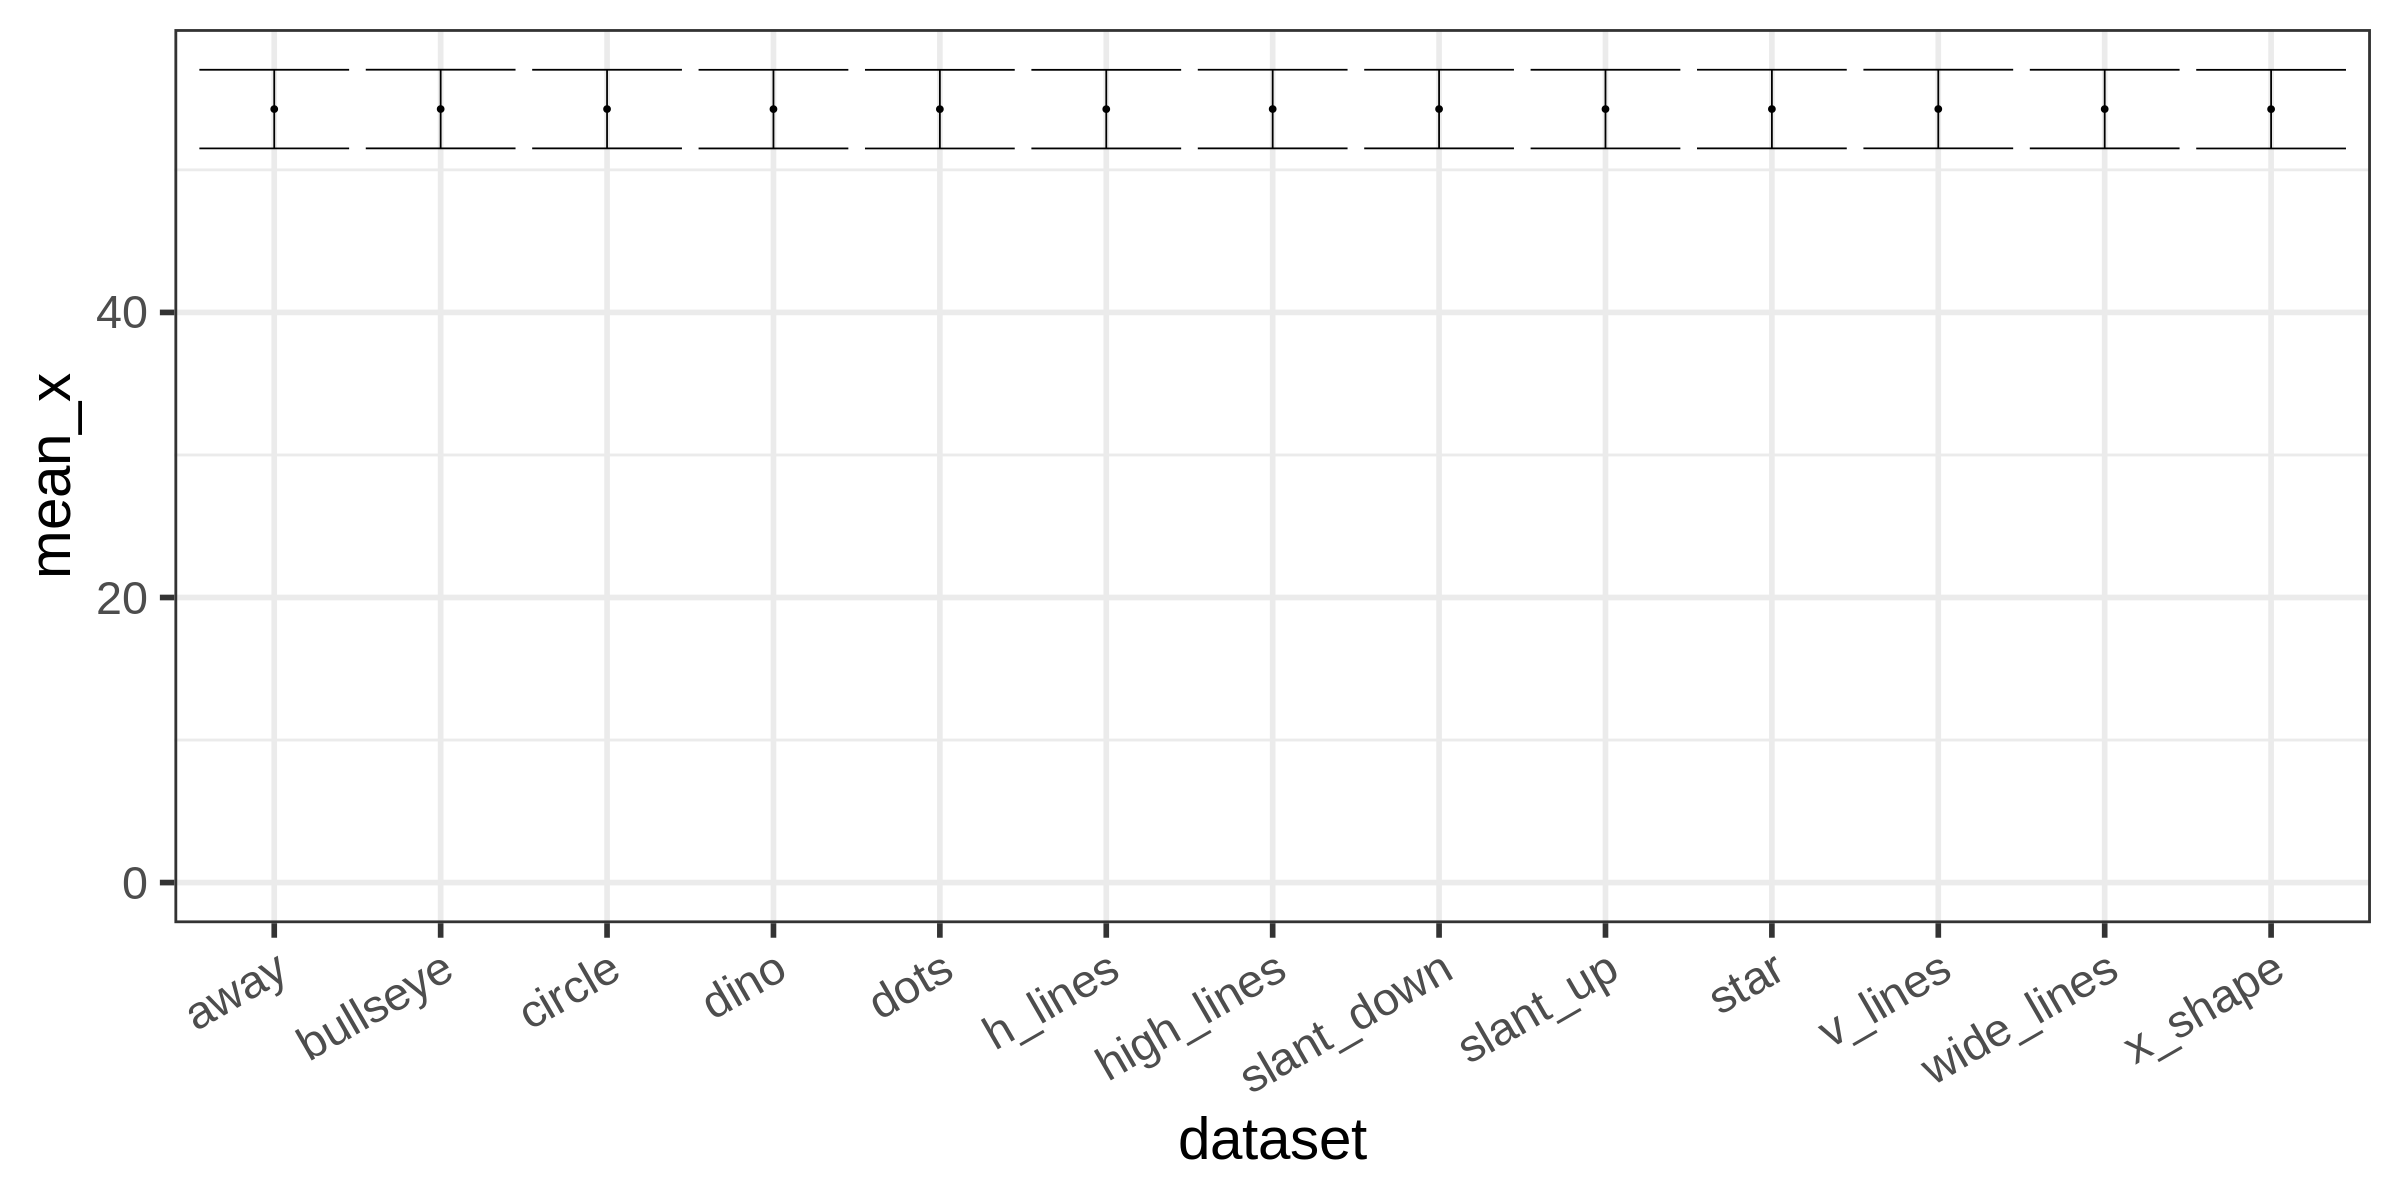

In [4]:
options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(df) +
    geom_point(aes(x = dataset, y = mean_x)) +
    geom_errorbar(aes(ymin = mean_x - ci_95_x,
                     ymax = mean_x + ci_95_x,
                     x = dataset)) +
    ylim(0, NA) +
    theme_bw(base_size = 35) +
    theme(legend.position = "none",
        axis.text.x = element_text(angle = 30, hjust = 1))

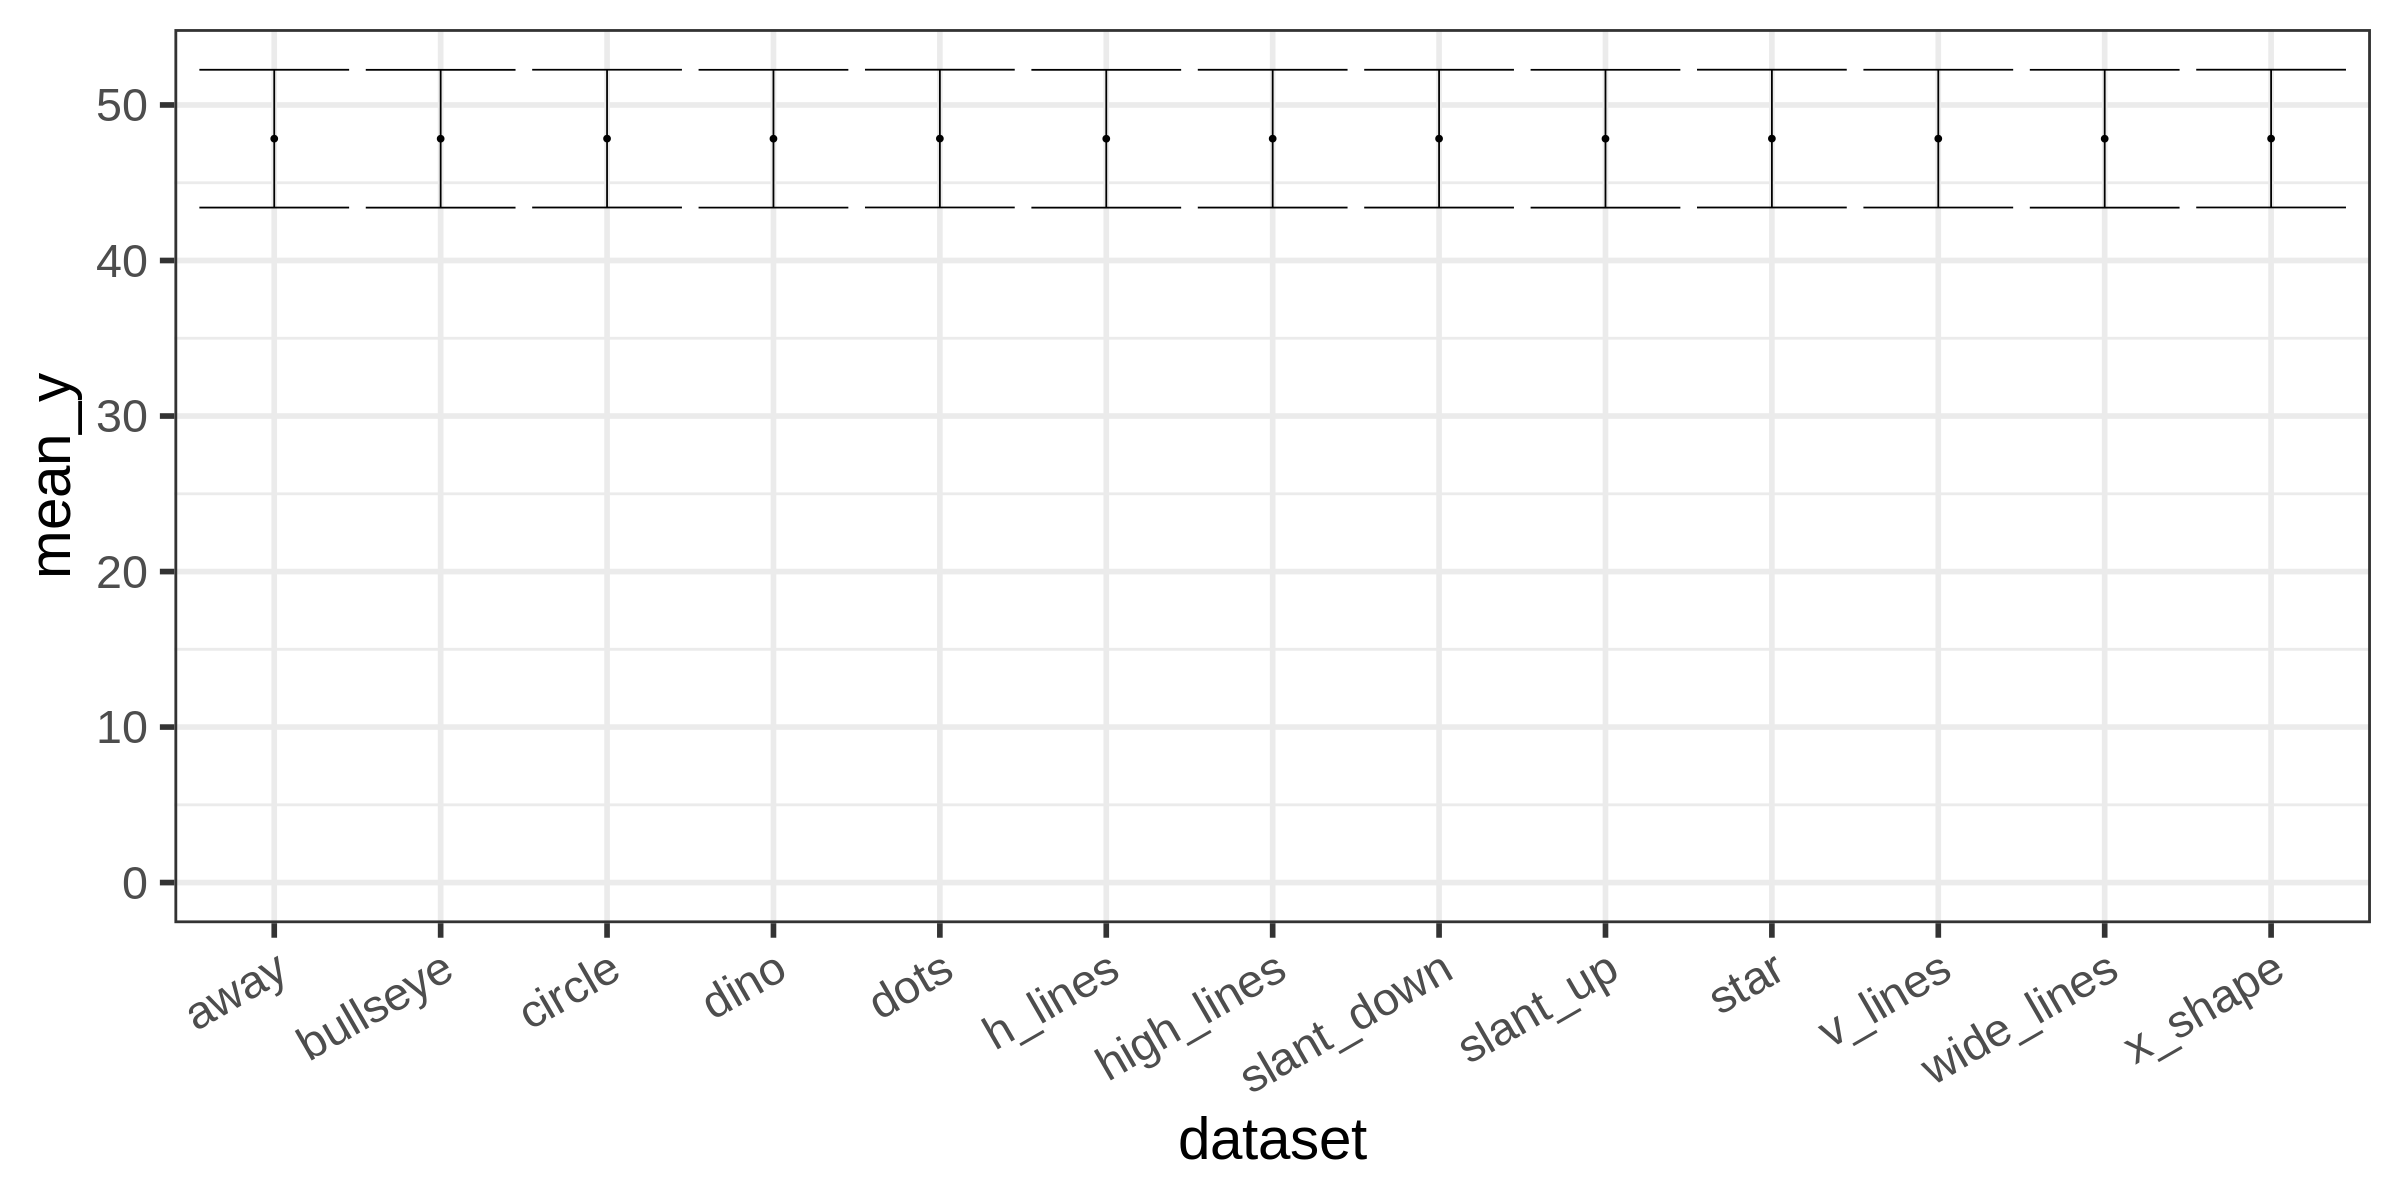

In [5]:
options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(df) +
    geom_point(aes(x = dataset, y = mean_y)) +
    geom_errorbar(aes(ymin = mean_y - ci_95_y,
                     ymax = mean_y + ci_95_y,
                     x = dataset)) +
    ylim(0, NA) +
    theme_bw(base_size = 35) +
    theme(legend.position = "none",
        axis.text.x = element_text(angle = 30, hjust = 1))

## Fazendo Gráficos

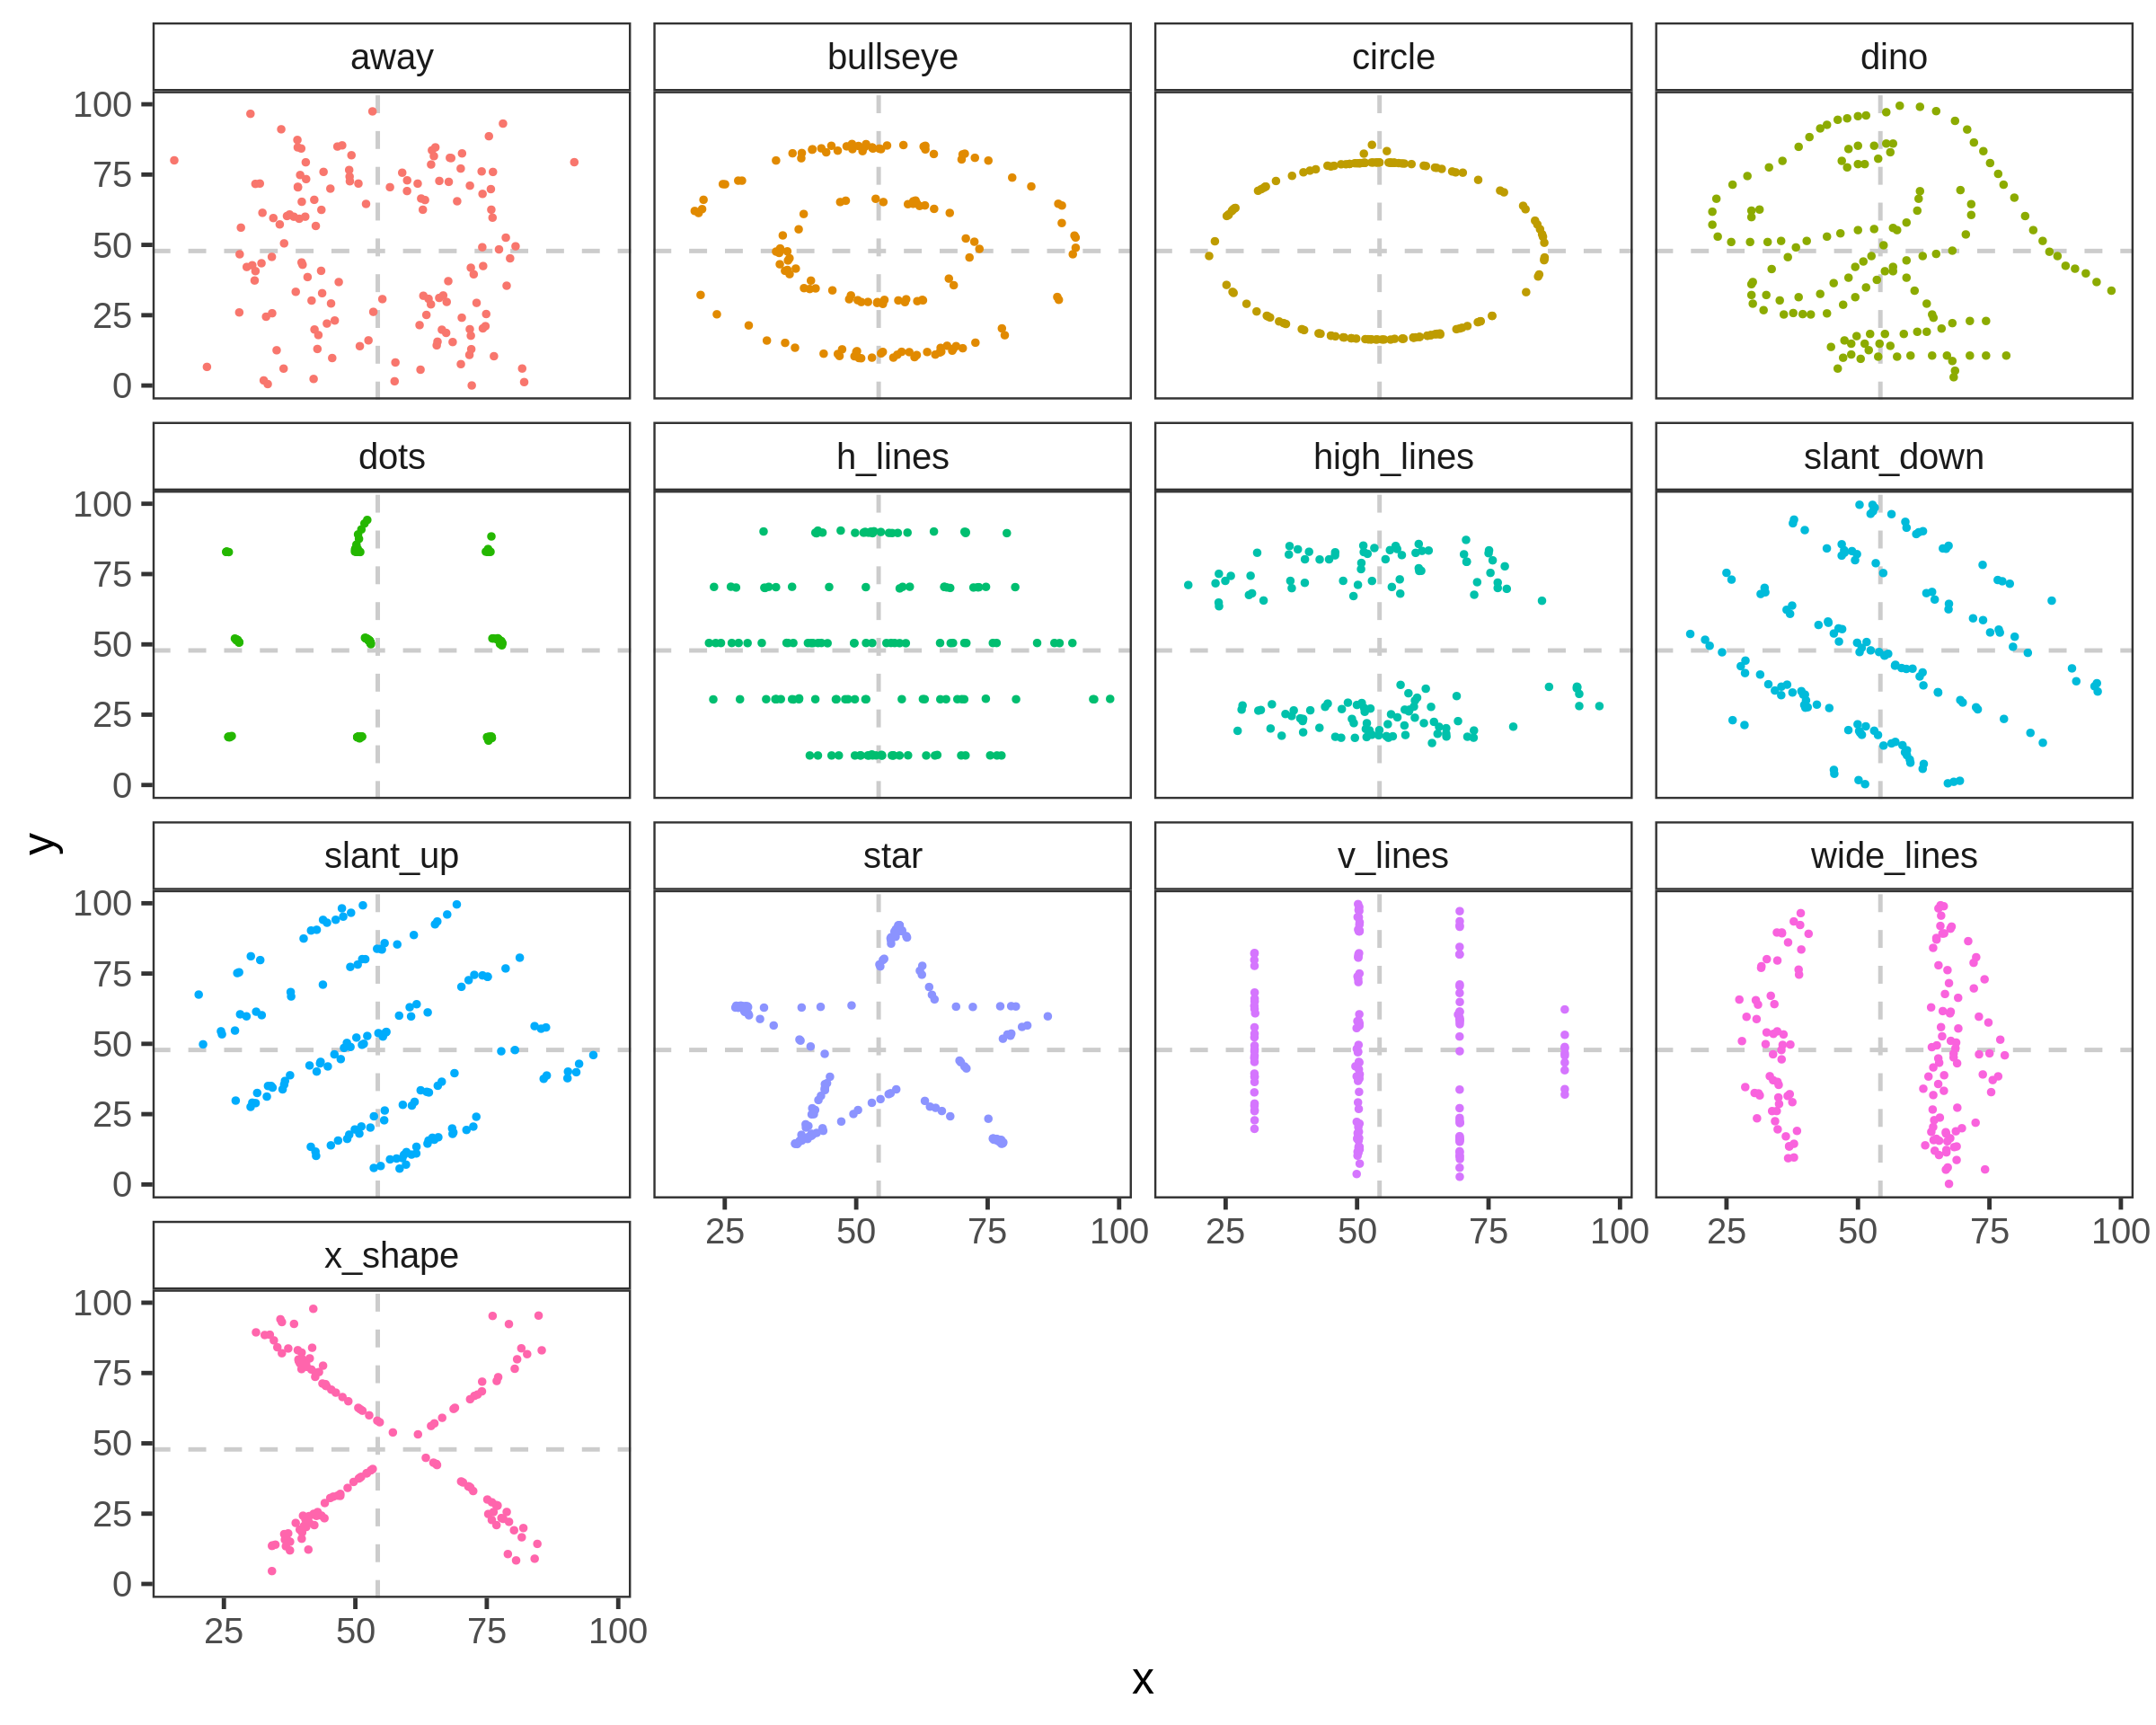

In [6]:
options(repr.plot.width = 20, repr.plot.height = 16)

ggplot() +
    geom_hline(data = df,
               size = 1.4,
               linetype = 2,
               alpha = 1,
               color = "gray80",
               aes(yintercept = mean_y)) +
    geom_vline(data = df,
               size = 1.4,
               linetype = 2,
               alpha = 1,
               color = "gray80",
               aes(xintercept = mean_x)) +
    geom_point(data = datasaurus_dozen,
               size = 2,
               aes(x = x, y = y, color = dataset)) +
    theme_bw(base_size = 30) +
    theme(legend.position = "none",
         panel.grid = element_blank(),
         strip.background = element_rect(fill = "transparent")) +
    facet_wrap(~ dataset, ncol = 4)

## Testando Modelos mais Complexos

`geom_smooth()` using formula 'y ~ x'



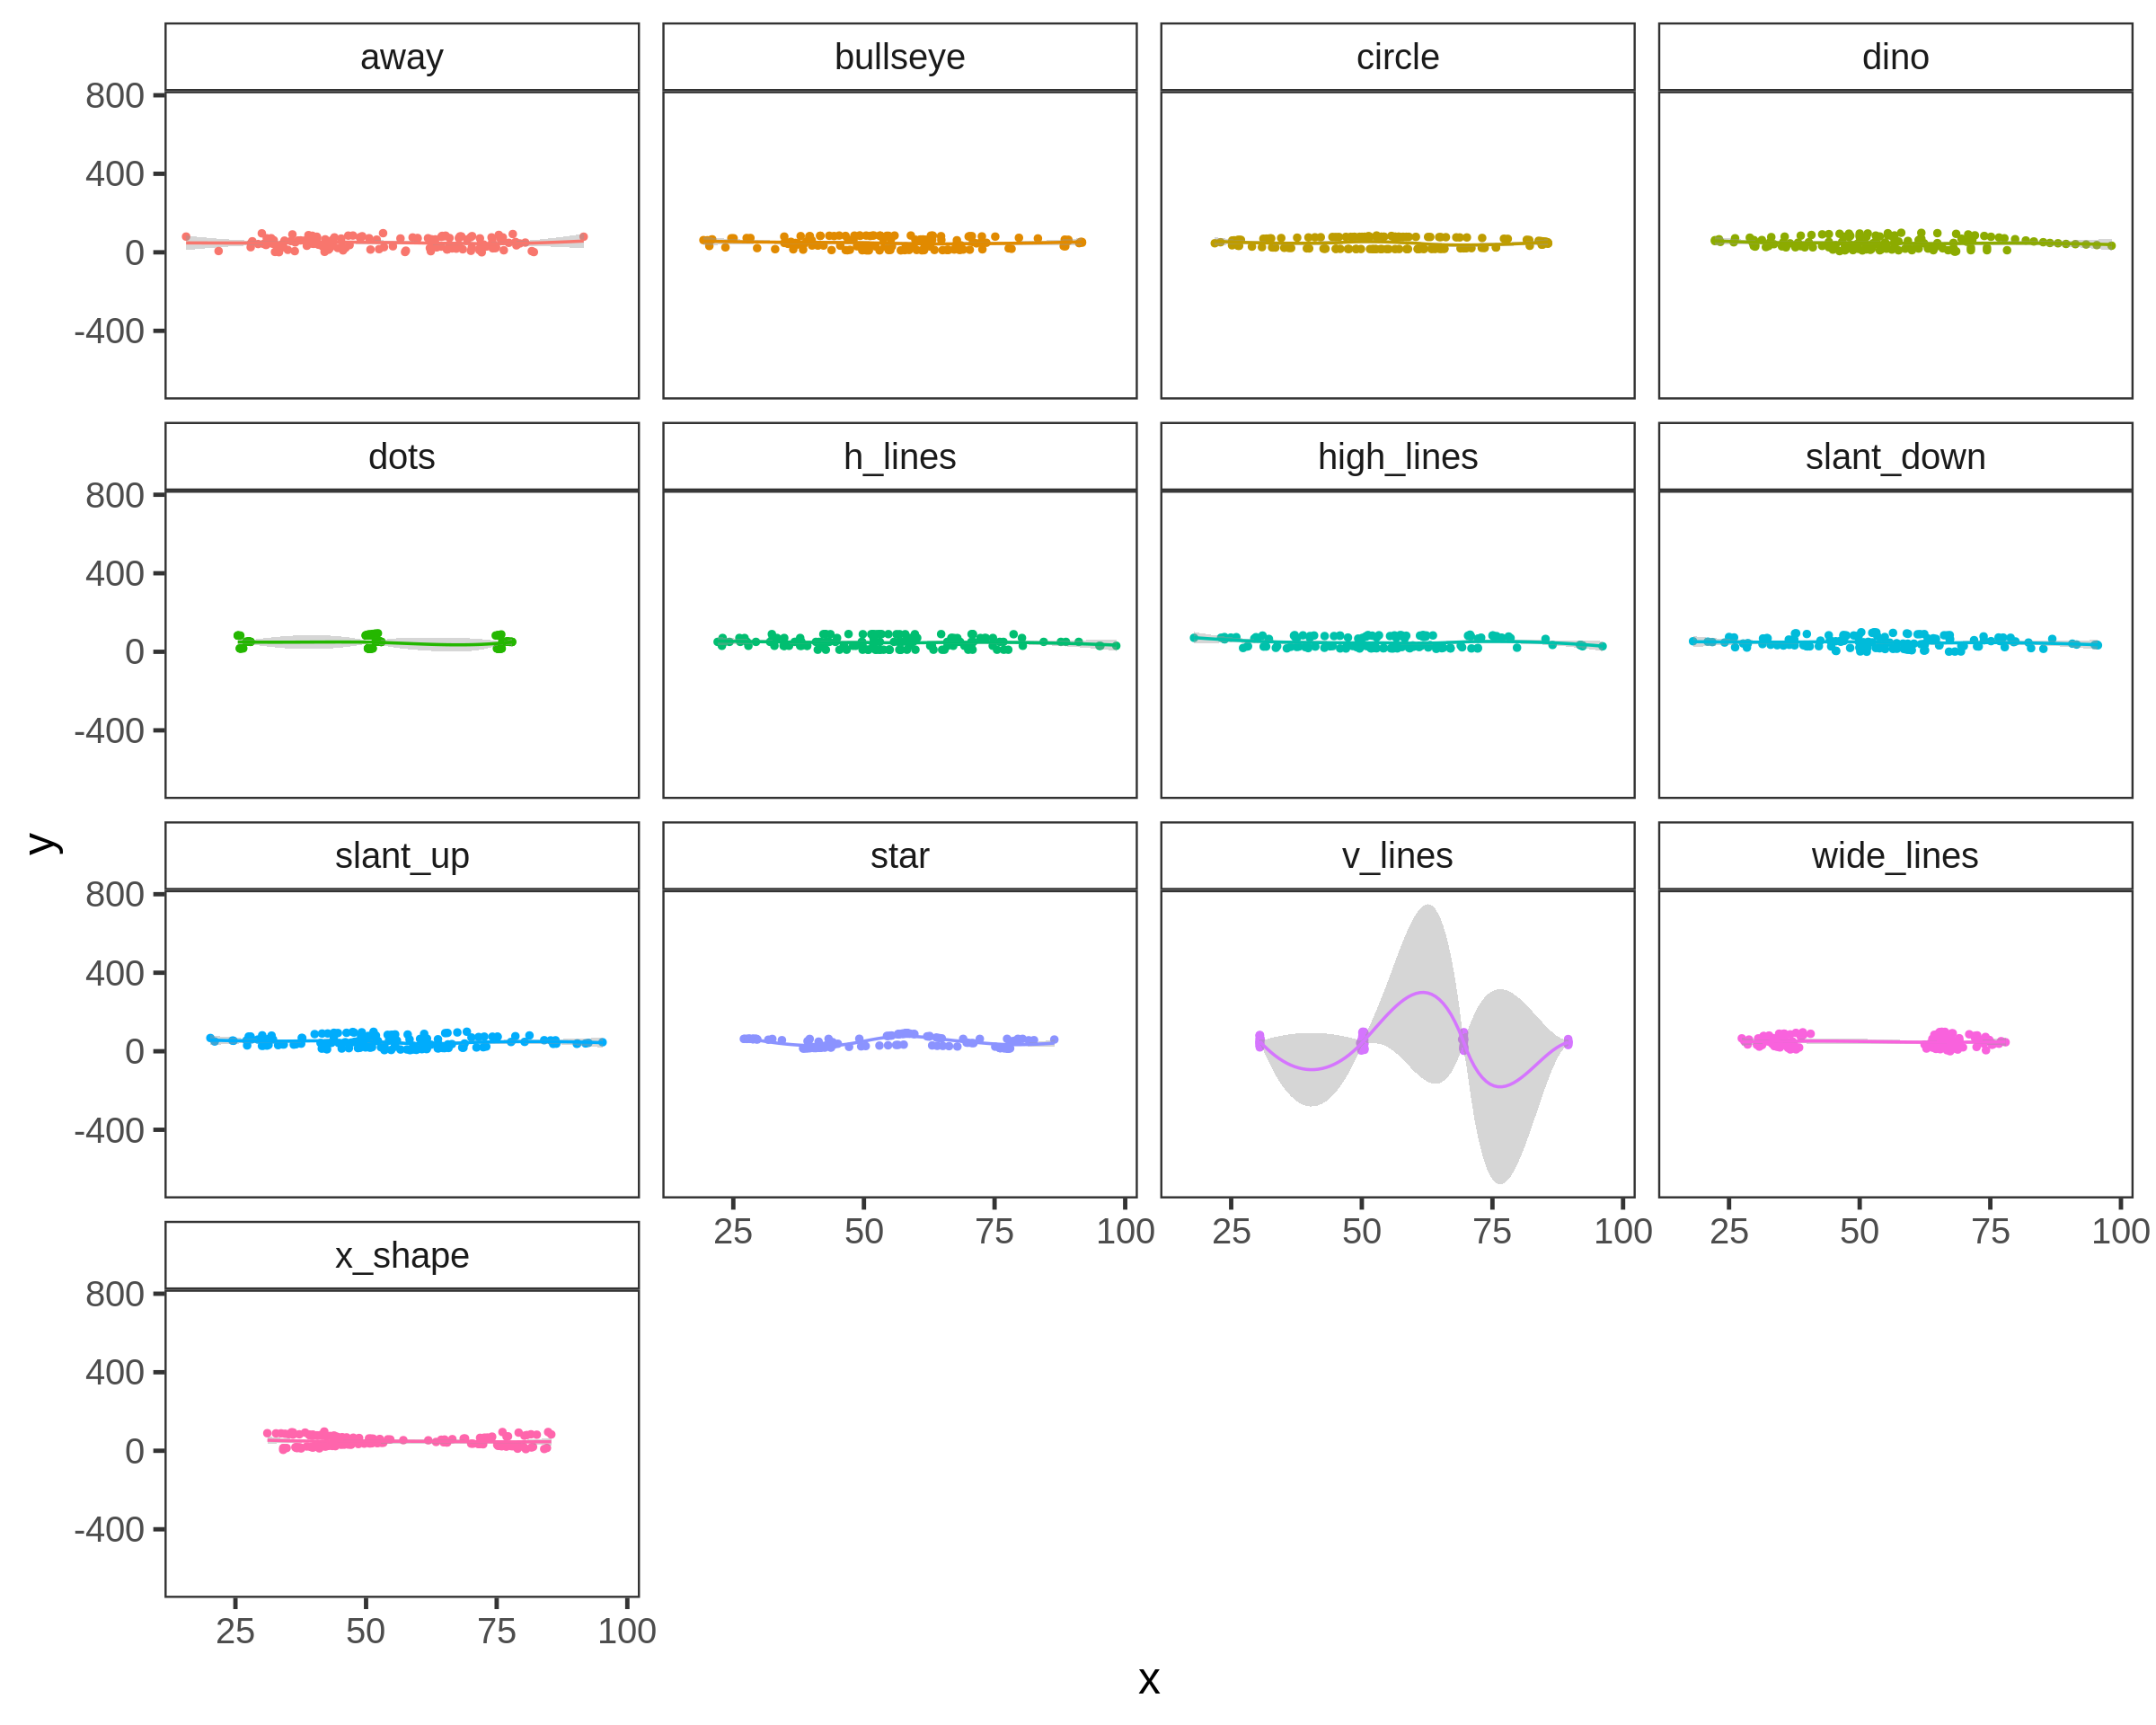

In [14]:
options(repr.plot.width = 20, repr.plot.height = 16)

ggplot() +
    geom_point(data = datasaurus_dozen,
               size = 2,
               aes(x = x, y = y, color = dataset)) +
    geom_smooth(data = datasaurus_dozen,
                method = "loess",
                #formula = y ~ x + I(x ^ 2) + I(x ^ 3),
                aes(x = x, y = y, color = dataset)) +
    theme_bw(base_size = 30) +
    theme(legend.position = "none",
         panel.grid = element_blank(),
         strip.background = element_rect(fill = "transparent")) +
    facet_wrap(~ dataset, ncol = 4)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



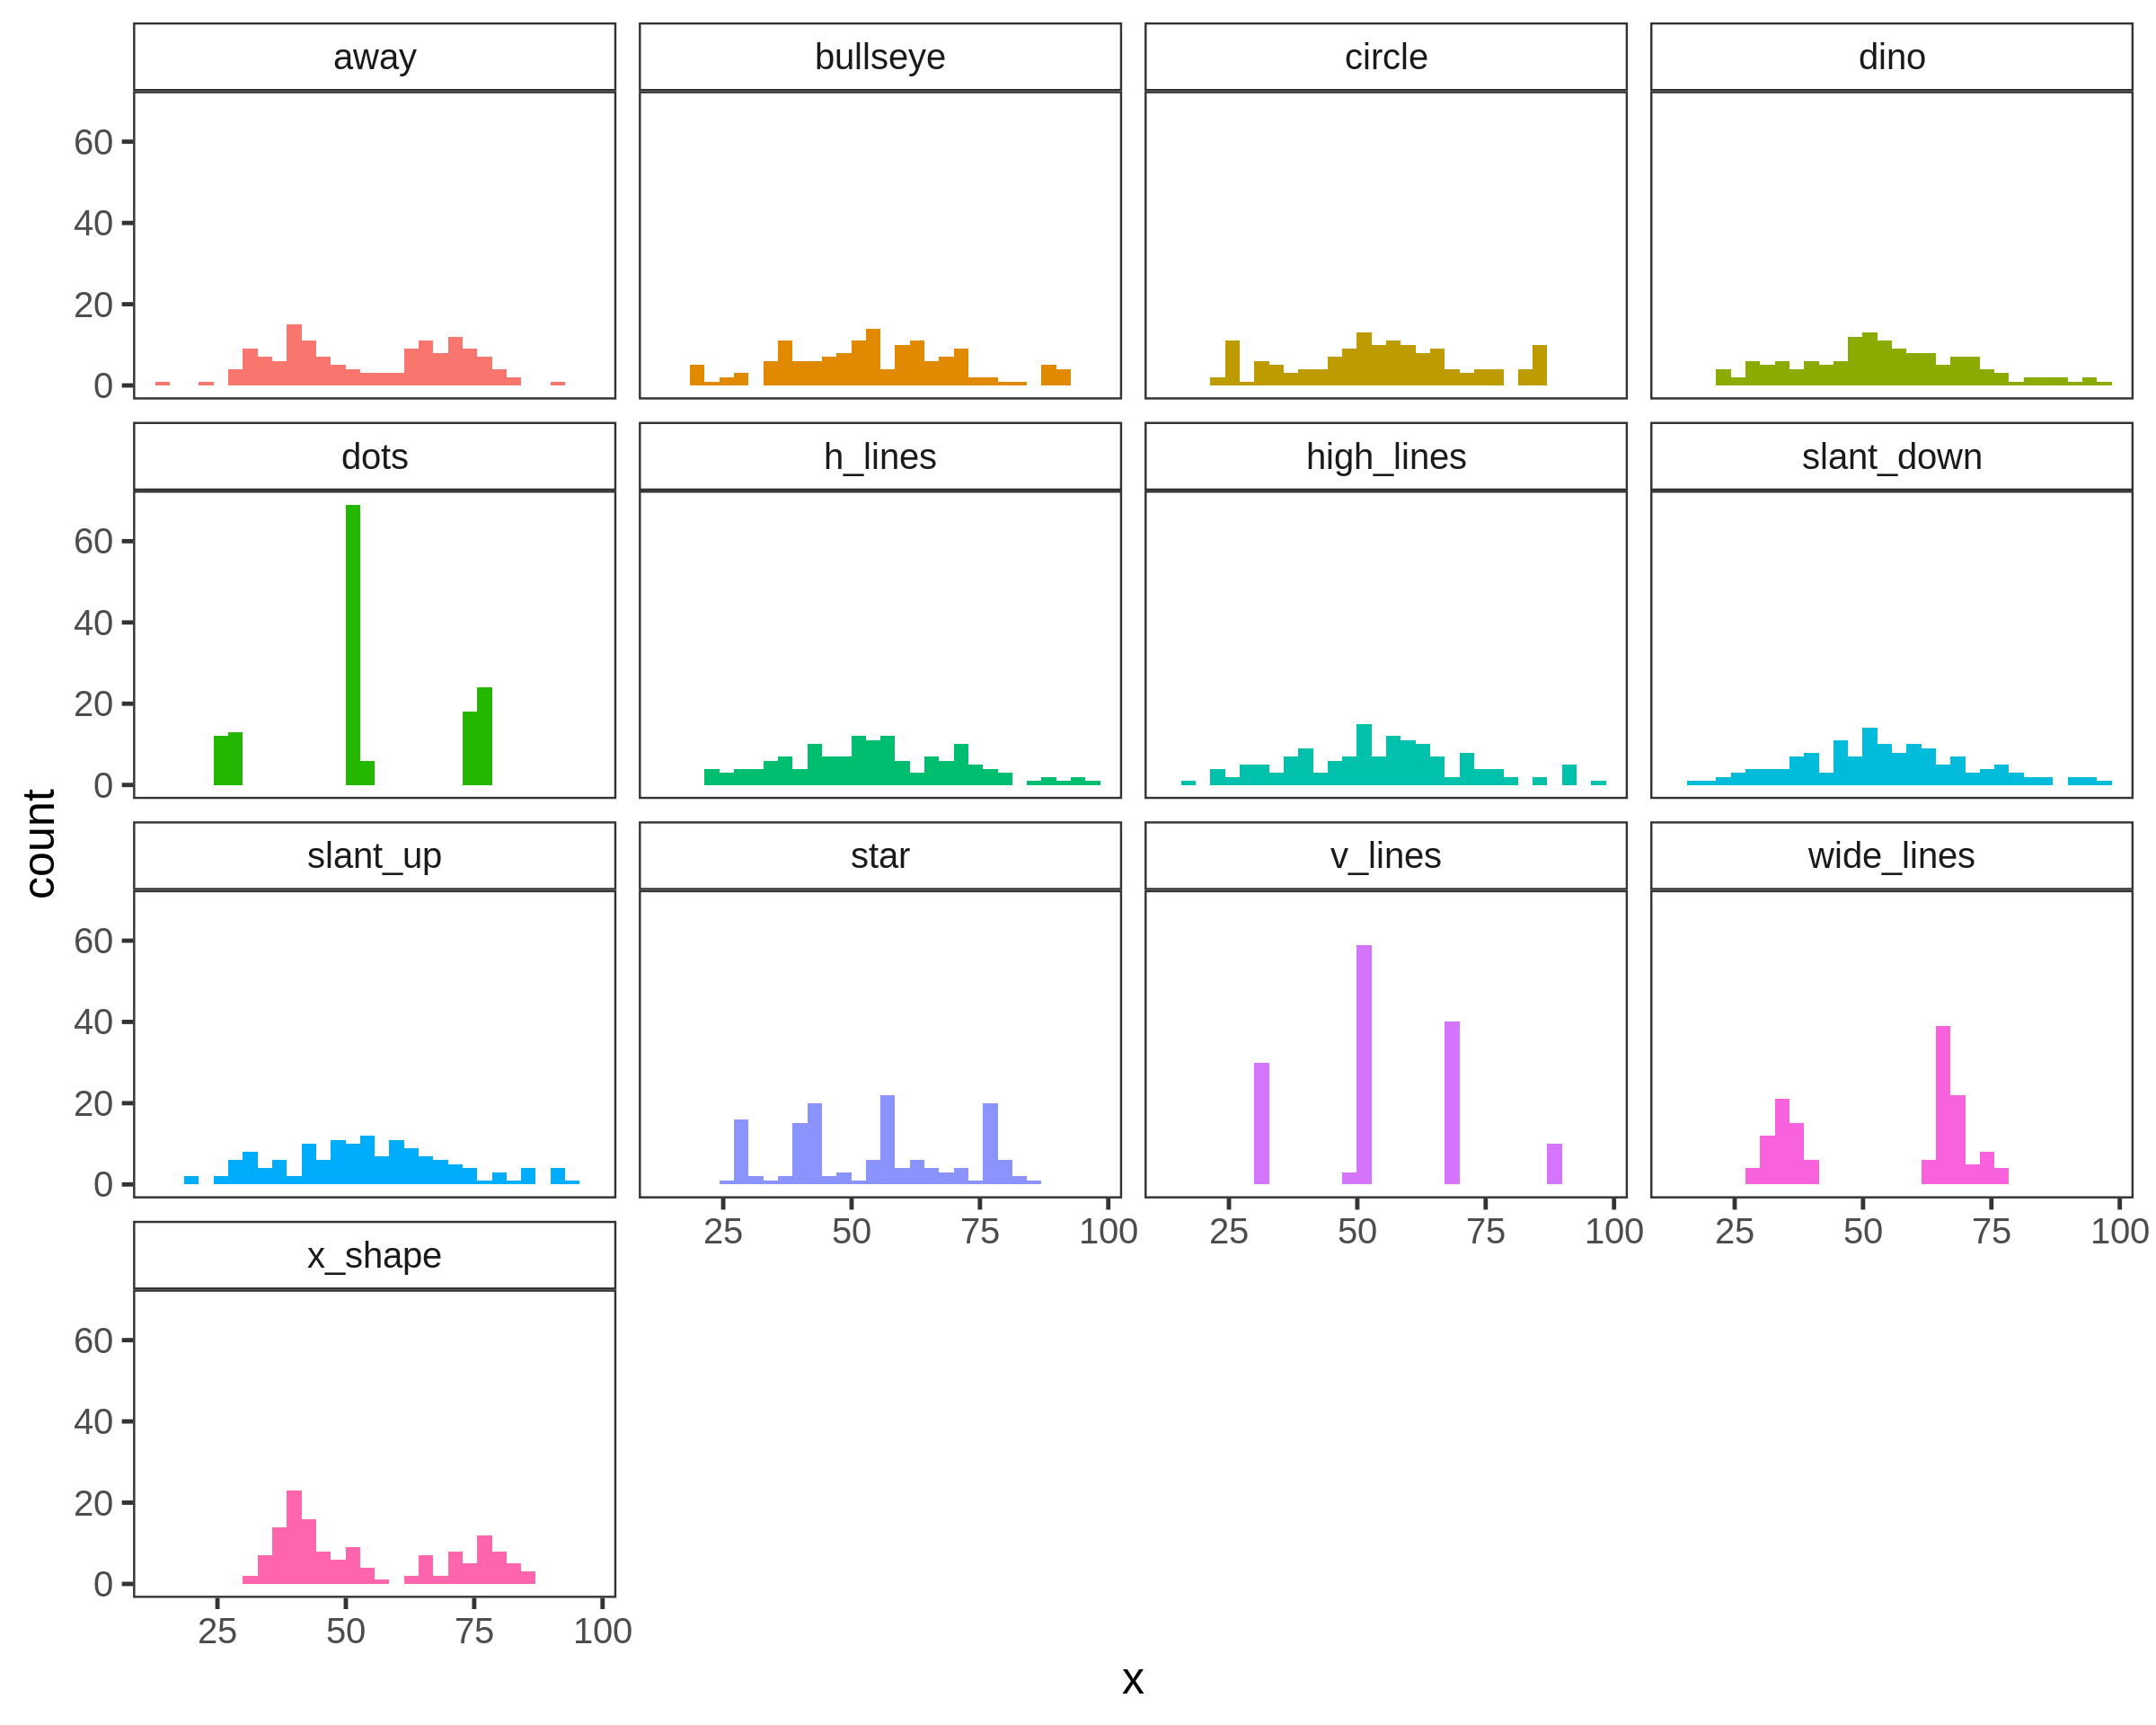

In [10]:
options(repr.plot.width = 20, repr.plot.height = 16)

ggplot() +
    geom_histogram(data = datasaurus_dozen,
               size = 2,
               aes(x = x, fill = dataset)) +

    theme_bw(base_size = 30) +
    theme(legend.position = "none",
         panel.grid = element_blank(),
         strip.background = element_rect(fill = "transparent")) +
    facet_wrap(~ dataset, ncol = 4)